In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

In [3]:
from torchvision import datasets,transforms

In [5]:
import torch.nn.functional as F
from torchvision.utils import make_grid

In [6]:
transforms=transforms.ToTensor()

In [9]:
train_data=datasets.CIFAR10(root='Balo',download=True,transform=transforms,train=True)

Files already downloaded and verified


In [10]:
test_data=datasets.CIFAR10(root='Balo',download=True,transform=transforms,train=False)

Files already downloaded and verified


In [11]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: Balo
    Split: Train
    StandardTransform
Transform: ToTensor()

In [12]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: Balo
    Split: Test
    StandardTransform
Transform: ToTensor()

In [25]:
train_data[0][0].shape

torch.Size([3, 32, 32])

In [15]:
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10,shuffle=False)


In [16]:
for images,labels in train_loader:
    break

In [17]:
labels

tensor([4, 4, 4, 4, 9, 4, 6, 9, 3, 5])

In [18]:
image=make_grid(images,nrow=10)

In [22]:
image.shape

torch.Size([3, 36, 342])

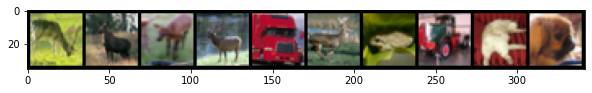

In [26]:
plt.figure(figsize=(10,6))
plt.imshow(np.transpose(image,(1,2,0)))

In [27]:
images.shape

torch.Size([10, 3, 32, 32])

In [31]:
print('Labels:',labels.numpy())

Labels: [4 4 4 4 9 4 6 9 3 5]


In [32]:
class Convultutional_network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3,6,3,1)
        self.conv2=nn.Conv2d(6,16,3,1)
        self.fc1=nn.Linear(6*6*16,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
        
    def forward(self,X):
        X=F.relu(self.conv1(X))
        X=F.max_pool2d(X,2,2)
        X=F.relu(self.conv2(X))
        X=F.max_pool2d(X,2,2)
        X=X.view(-1,16*6*6)
        X=F.relu(self.fc1(X))
        X=F.relu(self.fc2(X))
        X=self.fc3(X)
        
        return F.log_softmax(X,dim=1)

In [33]:
torch.manual_seed(42)
model=Convultutional_network()

In [34]:
model

Convultutional_network(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [35]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [36]:
epochs=10
train_losses=[]
predictedp=[]

for i in range(epochs):
    batch_corr=0
    for b,(X_train,y_train) in enumerate(train_loader):
        y_val=model(X_train)
        loss=criterion(y_val,y_train)
        predicted=torch.max(y_val.data,1)[1]
        batch_corr=(predicted==y_train).sum()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_losses.append(loss)
    predictedp.append(predicted)
    

C:\Users\rohan\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [37]:
train_losses

[tensor(1.6070, grad_fn=<NllLossBackward>),
 tensor(1.2327, grad_fn=<NllLossBackward>),
 tensor(0.5615, grad_fn=<NllLossBackward>),
 tensor(0.8744, grad_fn=<NllLossBackward>),
 tensor(1.7533, grad_fn=<NllLossBackward>),
 tensor(0.9494, grad_fn=<NllLossBackward>),
 tensor(1.1065, grad_fn=<NllLossBackward>),
 tensor(1.1312, grad_fn=<NllLossBackward>),
 tensor(0.7645, grad_fn=<NllLossBackward>),
 tensor(0.8698, grad_fn=<NllLossBackward>)]

In [39]:

test_loader_all=DataLoader(test_data,batch_size=10000,shuffle=False)
with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_loader_all):
        io=model(X_test)
        lossees=criterion(io,y_test)

In [42]:
lossees

tensor(1.1898)